# ARP Lab
## A Retirement Planning Laboratory

This package is a retirement modeling framework for exploring the sensitivity of retirement financial decisions. Strictly speaking, it is not a planning tool, but more an environment for exploring *what if* scenarios. It provides different realizations of a financial strategy. One can certainly have a savings plan, but due to the volatility of financial investments, it is impossible to have a certain asset earnings plan. This does not mean one cannot make decisions. These decisions need to be guided with an understanding of the sensitivity of the parameters.This is exactly where this tool fits it. Given your savings and spending desires, it can generate different future realizations of your strategy under different market assumptions, helping to better understand your financial situation.

Copyright - Martin-D. Lacasse (2023)

Disclaimers: *I am not a financial planner. You make your own decisions. This program comes with no guarantee. Use at your own risk.*

# Exploring the complex effects of Roth conversions

In this short notebook, we will explore the subtle effects of Roth conversions. We start with a couple having a little over \\$2M in assets. As is common, one spouse can significantly more assets than the other. Here, Bonnie enjoyed high wages and generous benefits from her employer, while Clyde had an equally enjoyable but less lucrative career.

### Loading the modules
The following commands load the required module and set the program to display informational messages as it runs. It also makes sure that all graphs are properly displayed within the jupyter interface.

In [6]:
%matplotlib inline
# import arp

import importlib
arp = importlib.import_module('arp')
importlib.reload(arp)

arp.setVerbose(True)

Setting verbose to True


## Initialize

Start with a couple being about 5 years from retirement. Bonnie is born in 64, while Clyde is two years younger.

In [9]:
plan1 = arp.Plan(YOB=[1964, 1966], expectancy=[87, 84])

Preparing scenario of 27 years for 2 individuals
Current ages in 2024 : [60 58]
Rate on tax-deferred estate set to 25%
Survivor spouse income fraction set to 0.6
Using default values for assets allocation ratios.
Initial assets allocation ratios set to: (%)
 [[0, 25, 50, 25], [0, 25, 50, 25]] 
 [[60, 40, 0, 0], [60, 40, 0, 0]] 
 [[60, 40, 0, 0], [60, 40, 0, 0]]
Final assets allocation ratios set to: (%)
 [[0, 25, 50, 25], [0, 25, 50, 25]] 
 [[60, 40, 0, 0], [60, 40, 0, 0]] 
 [[60, 40, 0, 0], [60, 40, 0, 0]]
Interpolated assets allocation ratios using linear method.
Using default fixed rates values: (%)
 [11.01  7.36  5.03  2.51]


## Assets balances in each type of savings accounts
You should be familiar with this command by now.

In [11]:
plan1.setAssetBalances(taxable=[100000, 50000], 
                       taxDeferred=[2000000, 400000],
                       taxFree=[120000, 25000],
                       beneficiary=[1, 1])

Taxable balances: [100000, 50000]
Tax-deferred balances: [2000000, 400000]
Tax-free balances: [120000, 25000]
Beneficiary: [1, 1]


## Contributions, earnings, and Roth conversions

In [13]:
plan1.readContributions('roth.xlsx')

Reading time horizon for Bonnie ...
Reading time horizon for Clyde ...
Successfully read time horizons from file roth.xlsx


##  Assets allocation ratios for each type of savings account

We will use a fully coordinated assets allocation strategy.

Coordinating both assets allocation ratios (%):
 initial: [60, 30, 5, 5] 
   final: [60, 30, 5, 5]
Interpolated assets allocation ratios using s-curve method.


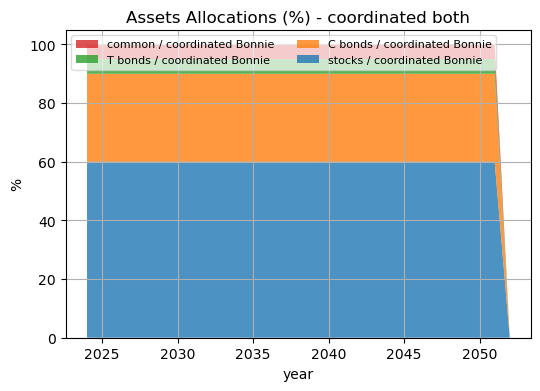

In [16]:
# For coordination taking place for each individual separately.
# plan1.setCoordinatedAR(initial=[[60, 30, 5, 5], [70, 30, 0, 0]], final=[[50, 30, 5, 15], [40, 20, 15, 25]])

# For a single individual, of for coordinating both spousal accounts simultaneously.
plan1.setCoordinatedAR(initial=[60, 30, 5, 5], final=[60, 30, 5, 5])

# An interpolation must follow either call for generating the data for all the years of the simulation.
plan1.interpolateAR('s-curve')
plan1.showAllocations()

## Desired income and income profile

Use a \\$120k as desired net income with a *smile* profile.

In [19]:
plan1.setDesiredIncome(120000, 'smile')

Using desired net income of $120,000 with a smile profile


## Pension and social security

In [21]:
plan1.setPension([0, 0], [65, 65])
plan1.setSocialSecurity([35000, 27000], [70, 67])

Setting pension of [0, 0] at age(s) [65, 65]
Setting SSA of [35000, 27000] at age(s) [70, 67]


This file contains anticipated income and contributions to savings accounts over the next few years. No Roth conversions are currenly planned in the file. Have a look at the worksheet in Excel. Very simple.

## Spousal split

In [24]:
plan1.setSpousalSplit('auto')

Using spousal split of auto


## Set rates and run case

We want to find the (near) best Roth conversions that can maximize the wealth at the end of life. Note that this is not an exercise trying to minimize the amount of tax paid. More taxes could be paid, if this leads to more wealth for the heirs conditional to satisfying a desired net income during the life span of Clyde and Bonnie. Is there a preferable sequence of conversions when markets are fluctuating? To answer this question, we will use the sequence of historical rates that happened from 1969 and the years after. Are there signs in the market that can indicate preferable times to make a Roth conversion? Let's run this case. We will use the `%%time` option of Jupyter to report the computer time to run the case. We will assume a tax rate of 25% to be applied to the tax-deferred portion left in the estate after Clyde and Bonnie have passed. This is done to be able to make meaningful comparisons between end-of-life portfolios that have a mix of tax-deferred and tax-free assets.

In [27]:
plan1.setRates('historical', 1969)

Using historical rates representing data from 1969 to 2023


Let's run the case with no conversion.

In [29]:
arp.setVerbose(False)
plan1.run();
plan1.estate(25)

2051 Estate: (today's $) $4,254,063 , cum. infl.: 332.3% , tax rate: 25.0%


Given the historical sequence of rates, including inflation, the final wealth in today's \\$ is about \\$4.3M. Now we try to find a better scenario that would include the (near) best sequence of Roth conversions.  The first and second arguments specify the plan to optimize and the tax rate on the tax-deferred portion of the estate. The minimization algorithm can also be given a Roth conversion amount to start considering down to the smallest adjustment to make. These values are specified using the `startConv` and `minConv` values. 

In [31]:
%%time
plan2, conversions = arp.optimizeRoth(plan1, 25, minConv=50, startConv=128000)
print(conversions)

Starting Roth optimizer. This calculation takes about a minute.
Each dot represents 100 different scenarios tested:
..........
.........
Returning after 1907 trials.
Estate increased from $4,254,063 to $5,027,408 ( $773,344 )
[[     0      0]
 [     0      0]
 [     0      0]
 [     0   3078]
 [     0      0]
 [     0      0]
 [622092   3462]
 [     0 133288]
 [     0      0]
 [     0      0]
 [203484     79]
 [230445  92178]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0  15807]
 [     0      0]
 [     0      0]
 [  2029  34641]
 [361686  72337]
 [     0      0]
 [402123  75397]
 [     0      0]
 [     0   6742]
 [     0      0]
 [     0      0]
 [     0      0]
 [     0      0]]
CPU times: total: 17.9 s
Wall time: 32.2 s


Assuming a tax rate of 25% on the tax-deferred account for the heirs, Roth conversions could increase the value by close to \\$800k (in today's \\$). Notice that running the algorithm multiple times will give different results depending on the random sequence used to obtain an optimal solution. These results are typically within +/-5% of one another.

We can save all withdrawals and events using the `saveInstance()` function, instructing to overwrite the file if it exists.

In [33]:
plan2.estate(25)
plan2.saveInstance('optimized roth for b+c', True)

2051 Estate: (today's $) $5,027,408 , cum. infl.: 332.3% , tax rate: 25.0%


Let's compare the two scenarios. In particular, compare the suggested conversions with the fluctuactions in the market. Also, notice how the composition of the savings accounts at the end of life is quite different between the two cases.

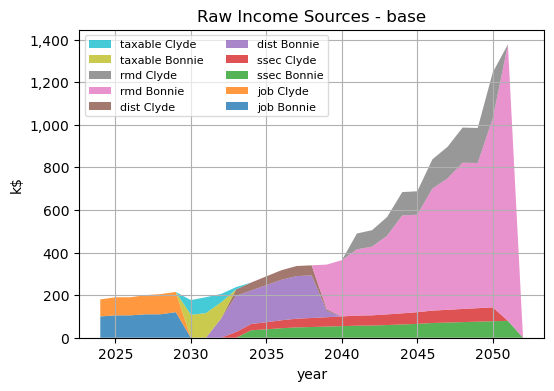

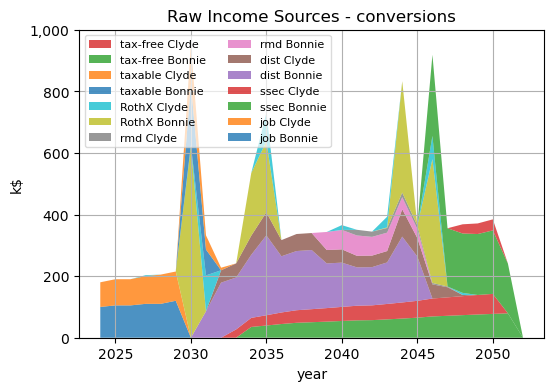

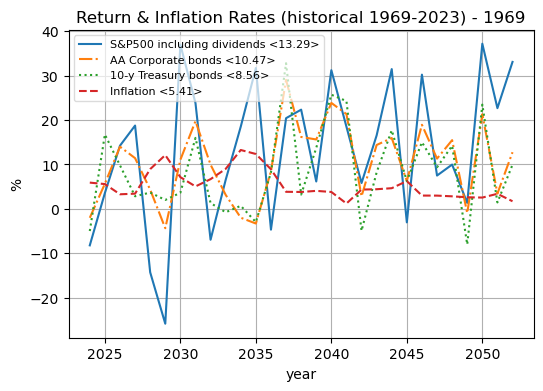

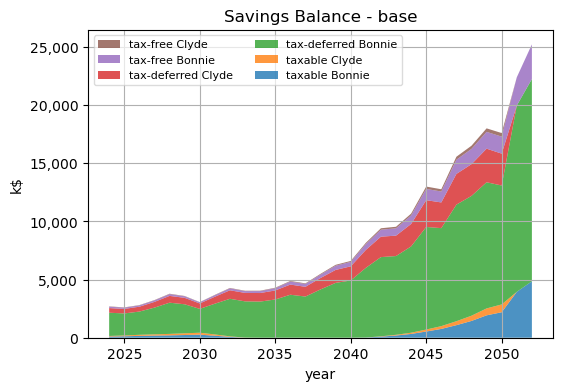

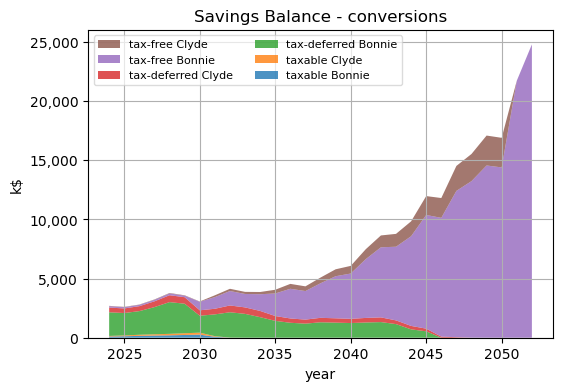

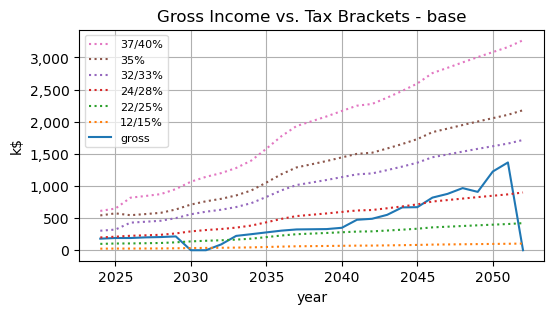

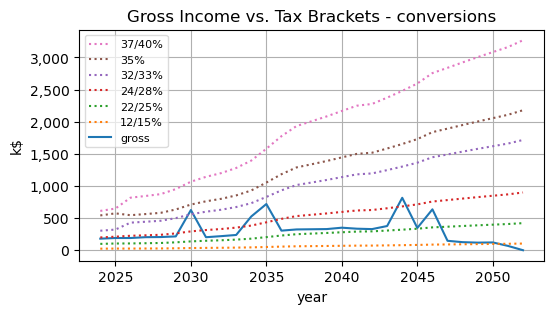

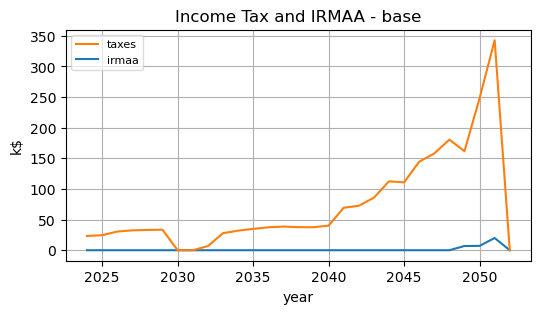

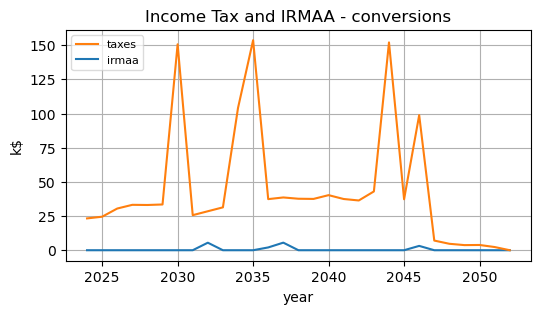

In [35]:
plan1.showSources('base')
plan2.showSources('conversions')

plan1.showRates('1969')

plan1.showAccounts('base')
plan2.showAccounts('conversions')

plan1.showGrossIncome('base')
plan2.showGrossIncome('conversions')

plan1.showTaxes('base')
plan2.showTaxes('conversions')

### Brief analysis
Note how the Roth conversions are timed with the spikes in rates of return, reinforcing the practice that making Roth conversion during the downturns of the market is an excellent strategy. Here, the Roth conversions are assumed to be done early in the year, before the annual rate of return is applied. As a results, conversions in the same year as when the market recovers is the best strategy. As we do not know when the market will bounce, we do know when the market goes down, and therefore a strategy of converting any time during a market large dip is good.

When tax-deferred assets are large, the RMDs can have a significant tax impact in the middle-to-late years of retirement. Roth conversion smooths out these income peaks by shifting the tax burden earlier in the retirement and avoiding large RMDs later in life. Moreover, coordinated accounts can maintain a balanced portfolio while shifting high-performance (but riskier) assets to a tax-free account, further reducing the tax burden on the remaining assets.

When return rates are constant, the proposed Roth conversions will tend to align with a given tax bracket (dashed lines), following common wisdom. The situation here is a combination of both, as it seems advantageous to break the tax bracket line for generating more return in a tax-free account before a swing of market recovery.

### More questions

Roth conversions have complex implications and should be considered for reasons beyond those strictly comparing the tax rate now with possible tax rates of the future. Many more questions can be explored:
- What is the effect of a *smile* spending profile vs a *flat* spending profile?
- What are the benefits of accounts allocations in this case? What if accounts allocations are not coordinated?
- What if both spouses have large tax-deferred assets?
- What is the effect of the tax-deferred tax rate assumed? Does a rate of 30% give the same answer as 20%?
- What happens in years other than 1969? Are the effects as significant?
- ...

ARP Lab is designed to tackle these questions. They can be answered by changing only a few parameters in this file. Or in your own case file.

Go explore!
  